In [1]:
import sys
import numpy as np
%matplotlib ipympl
import matplotlib.pyplot as plt

sys.path.append("/Users/massimilianochella/AstroCosmoComputational/Students/MASSI")
from pyACC.MC.rejection import rejection_sampling1D

def target_distribution1(x):
    return np.exp(-(x) ** 2 / 2) / np.sqrt(2 * np.pi)

Maximum value of the PDF =  0.3989372836656826 , Maximum value of Y_box =  0.43883101203225083


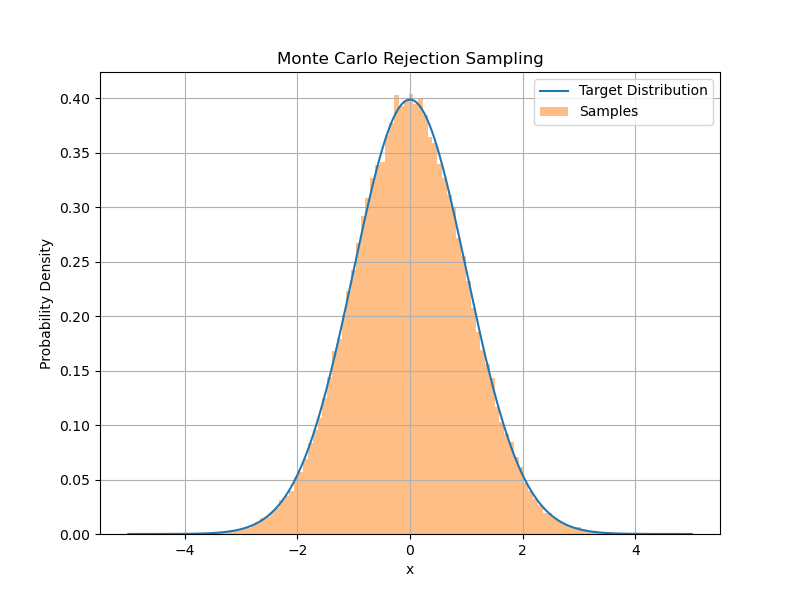

In [2]:
# Parameters
num_samples = 100000
xmin = -5
xmax = 5
x_values = np.linspace(xmin, xmax, 1000)


# Generate samples using rejection sampling
samples = rejection_sampling1D(target_distribution1, xmin, xmax, num_samples)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x_values, target_distribution1(x_values), label='Target Distribution')
plt.hist(samples, bins=100, density=True, alpha=0.5, label='Samples')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Monte Carlo Rejection Sampling')
plt.legend()
plt.grid(True)
plt.show()


Ora utiluzzo una pdf 2d con rejection_sampling2D

In [3]:
from pyACC.MC.rejection import rejection_sampling2D
from scipy.integrate import dblquad
from mpl_toolkits.mplot3d import Axes3D


def integra(x,y):
    return np.exp(-x ** 4 / 2) * np.exp(-y ** 4 / 2)

N, error = dblquad(integra, -np.inf, np.inf, -np.inf, np.inf)
def target_distribution2(x,y):
    return np.exp(-(x) ** 4 / 2) * np.exp(-y ** 4 / 2) * (1/N)



# Parameters
num_samples = 50000

xmin = -5
xmax = 5

ymin = -5
ymax = 5


x_values = np.linspace(xmin, xmax, 1000)
y_values = np.linspace(ymin, ymax, 1000)


Maximum value of the PDF =  0.21517055652351555 , Maximum value of Y_box =  0.2366876121758671


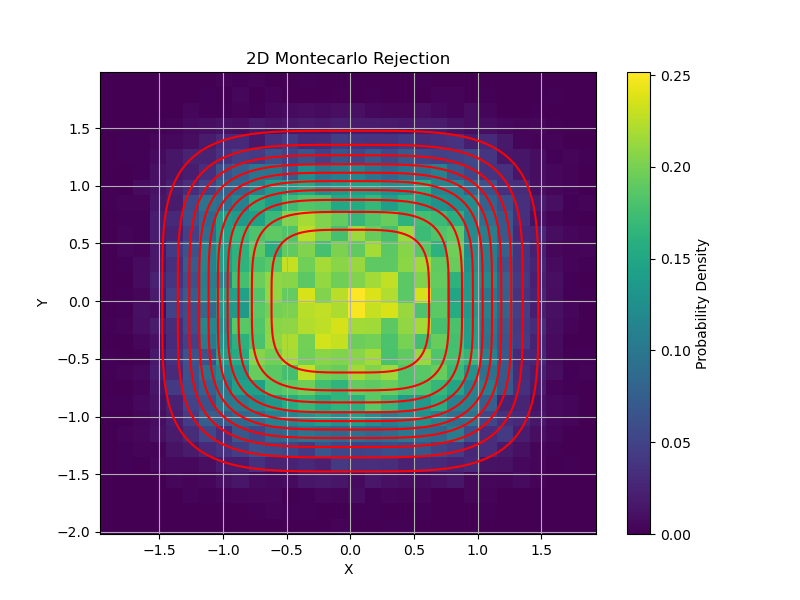

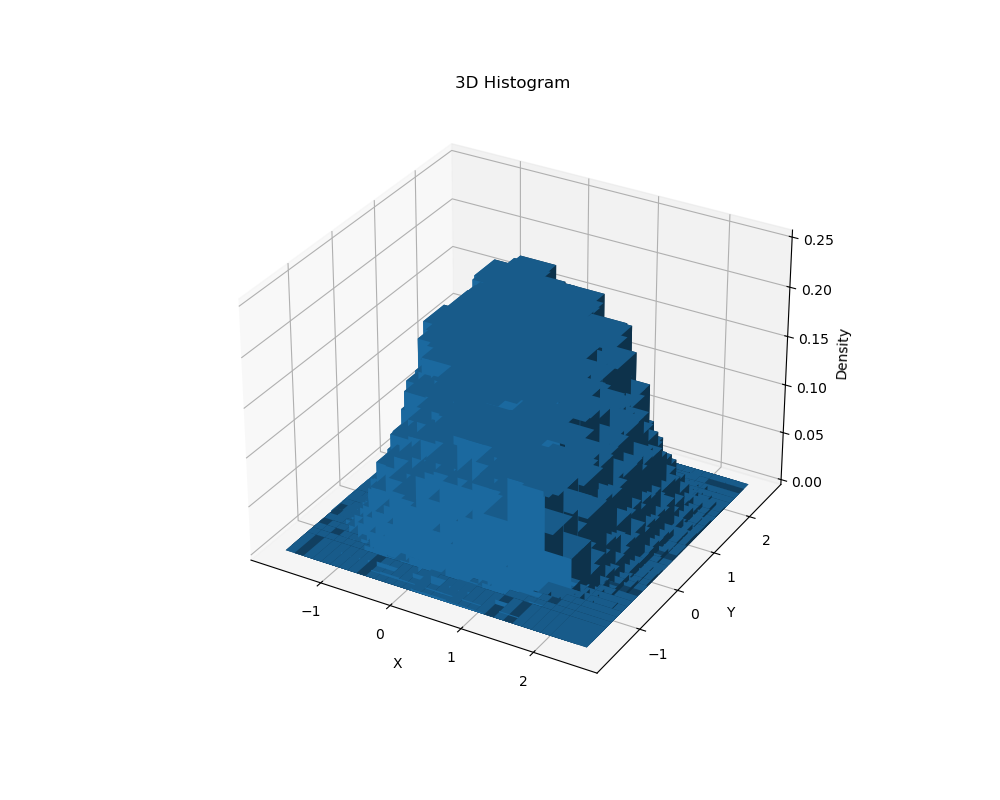

In [4]:
X, Y = np.meshgrid(x_values, y_values)
Z = target_distribution2(X, Y)

# Generate samples using rejection sampling
x, y = rejection_sampling2D(target_distribution2, xmin, xmax, ymin, ymax, num_samples)

# Plot the results
plt.figure(figsize=(8, 6))
# Overlay PDF
plt.contour(x_values, y_values, Z, levels=10, colors='r', linestyles='solid')
plt.hist2d(x, y, bins=30, density=True, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Montecarlo Rejection')
plt.grid(True)
plt.show()



# Create 2D histogram
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(x, y, bins=30, density=True)


# Construct arrays for the anchor positions of the bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')


# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')
ax.set_title('3D Histogram')

plt.show()